In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',30)

In [2]:
df= pd.read_csv('kidney_disease.csv')
df.head(15)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [5]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [6]:
classification= {'ckd\t':1, 'ckd':1, 'notckd':0}
df['classification']= df['classification'].map(classification)

In [7]:
df.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [8]:
df1= df.drop(['id','rbc','rc','wc','pot','sod','pcv'], axis=1)

In [9]:
df1= df1.dropna()
df1.shape

(251, 19)

In [10]:
df1.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,1
6,68.0,70.0,1.010,0.0,0.0,normal,notpresent,notpresent,100.0,54.0,24.0,12.4,no,no,no,good,no,no,1


In [11]:
row_rep = {'yes':1,'no':0,'normal':1,'abnormal':0,'present':1,'notpresent':0,'good':1,'poor':0,'\tno':0,'\tyes':1,' yes':1}
df1 = df1.replace(row_rep)
df1.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,1,1,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,0,0,0,1,0,0,1
6,68.0,70.0,1.010,0.0,0.0,1,0,0,100.0,54.0,24.0,12.4,0,0,0,1,0,0,1


In [12]:
X= df1.drop('classification', axis= 1)
y= df1.classification

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20, stratify= y)

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy_score(y_test, pred_1)

1.0

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [19]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': False}

In [31]:
# Manually provide the best parameters to model for training
model_12 = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': False})

model_12= model_12.fit(X_train, y_train)

In [32]:
pred_12 = model_12.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, mean_squared_error
accuracy_score(y_test, pred_12)

1.0

In [36]:
model_12.feature_importances_

array([3.21701512e-03, 6.45951744e-03, 1.34177105e-01, 1.22471311e-01,
       9.02690146e-03, 8.23551970e-03, 5.74941148e-04, 1.01857302e-04,
       4.29330506e-02, 3.79258640e-02, 1.92559168e-01, 3.04435326e-01,
       6.27269973e-02, 5.50149800e-02, 0.00000000e+00, 1.78583536e-02,
       1.67885897e-03, 6.03233360e-04])

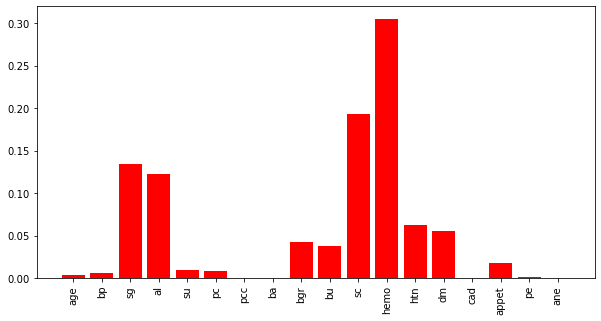

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(18), model_12.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(18))
ax.set_xticklabels(X.columns, rotation='vertical')
plt.show()

In [38]:
import pickle

In [39]:
# open a file, where you ant to store the data
file = open('kidney_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_12, file)